# Introduction 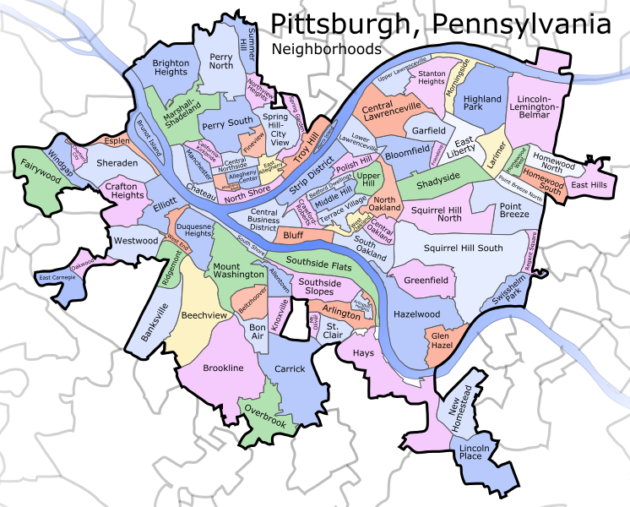

The main purpose of this project is to determine the "best" neighborhood in Pittsburgh based on datasets from the WPRDC (Western Pennsylvania Regional Data Center). My approach for this problem is to determine the "best" neighborhood through my standards of livability. I came up with this process while thinking about living in the city when I'm out of school. I might have kids eventually, so I looked at data that would help me determine if one neighborhood is better than another for raising a child.

# The Metric

Like I mentioned in my introduction, I'm determining the best neighborhood based on my standards of livability. I'll be looking at the number of arrests in each neighborhood, number of parking meters in each neighborhood, and number of playgrounds in each neighborhood. My metric is made up of three datasets: **Pittsburgh Police Arrest Data, Parking Meters Pittsburgh Parking Authority, and City of Pittsburgh Playgrounds.**

* I'm looking at the number of arrests as my general level of safety. The more arrests in an area, the less safe I'm assuming it is, for the purposes of this project only. Since the arrests dataset is huge, I will only be considering neighborhoods with 500 arrests or fewer.

* Why include parking meters? When people come over I don't want them to have to pay for parking. Lack of parking meters also suggests more residential streets than commercial ones, and thus more parking in general.

* Playgrounds are a great indicator for livability. They can be a place to get some fresh air, walk the dog, play with your kids, have a gathering etc. etc. 

# The Best Neighborhood

For any data analysis we gotta import pandas and matplotlib.

In [38]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_rows', None)

Next, we've got to import all three of our datasets so we can write some sick nasty code and perform our analysis.

In [39]:
arrest = pd.read_csv("pittsburgh police arrest data.csv")
meters = pd.read_csv("parking meters.csv")
playground = pd.read_csv("playgrounds.csv")

Let's take a look at the arrests data first, as it's the largest dataset.

**Arrests**

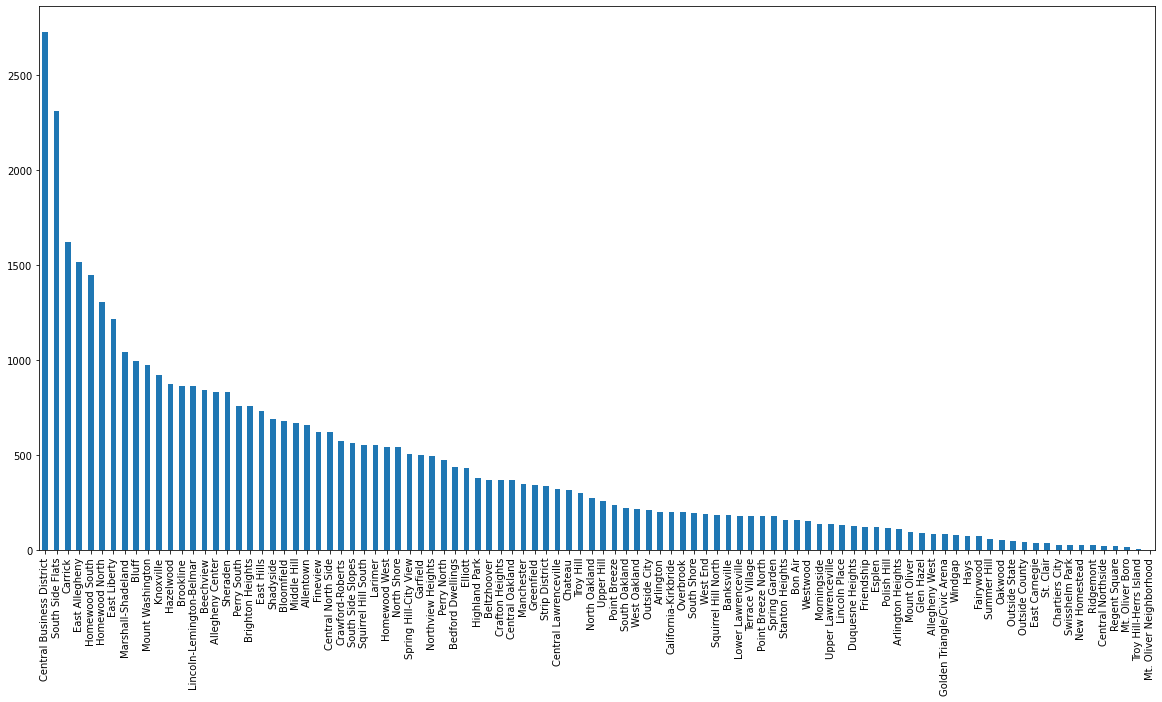

In [40]:
noar=arrest["INCIDENTNEIGHBORHOOD"].value_counts()
noar.plot(kind='bar', figsize=(20,10))

There are **98** different neighborhoods that are included in this dataset. In order to make the process of narrowing down the best neighborhood easier, I'm only going to consider neighborhoods with less than 500 arrests.

In [41]:
def filter_less_than(x, threshold):
        return not(len(x) > threshold)


safe = arrest.groupby("INCIDENTNEIGHBORHOOD").filter(filter_less_than, 
                                                     threshold=500)

safe.groupby("INCIDENTNEIGHBORHOOD").count()

PK  CCR  AGE  GENDER  RACE  ARRESTTIME  \
INCIDENTNEIGHBORHOOD                                                   
Allegheny West                85   85   84      85    85          85   
Arlington                    199  199  198     199   199         199   
Arlington Heights            109  109  109     109   109         109   
Banksville                   184  184  183     184   184         184   
Bedford Dwellings            438  438  437     438   438         438   
Beltzhoover                  369  369  365     369   369         369   
Bon Air                      157  157  156     157   157         157   
California-Kirkbride         197  197  197     197   197         197   
Central Lawrenceville        319  319  318     319   319         319   
Central Northside             23   23   23      23    23          23   
Central Oakland              367  367  365     367   367         367   
Chartiers City                28   28   28      28    28          28   
Chateau                      313  313  313     313   313         313   
Crafton Heights              368  368  366     368   368         368   
Duquesne Heights             128  128  128     128   128         128   
East Carnegie                 36   36   35      36    36          36   
Elliott                      431  431  429     431   431         431   
Esplen                       121  121  121     121   121         121   
Fairywood                     74   74   74      74    74          74   
Friendship                   122  122  122     122   122         122   
Garfield                     500  500  498     500   500         500   
Glen Hazel                    90   90   90      90    90          90   
Golden Triangle/Civic Arena   83   83   82      83    83          83   
Greenfield                   341  341  339     341   341         341   
Hays                          75   75   75      75    75          75   
Highland Park                380  380  377     380   380         380   
Lincoln Place                129  129  129     129   129         129   
Lower Lawrenceville          181  181  179     181   181         181   
Manchester                   349  349  347     349   349         349   
Morningside                  137  137  137     137   137         137   
Mount Oliver                  96   96   95      96    96          96   
Mt. Oliver Boro               16   16   16      16    16          16   
Mt. Oliver Neighborhood        2    2    2       2     2           2   
New Homestead                 26   26   26      26    26          26   
North Oakland                272  272  268     272   272         272   
Northview Heights            492  492  490     492   492         492   
Oakwood                       54   54   54      54    54          54   
Outside City                 208  208  207     208   208         208   
Outside County                41   41   41      41    41          41   
Outside State                 45   45   45      45    45          45   
Overbrook                    197  197  196     197   197         197   
Perry North                  474  474  462     474   474         474   
Point Breeze                 238  238  233     238   238         238   
Point Breeze North           177  177  173     177   177         177   
Polish Hill                  114  114  113     114   114         114   
Regent Square                 22   22   22      22    22          22   
Ridgemont                     24   24   24      24    24          24   
South Oakland                220  220  220     220   220         220   
South Shore                  196  196  194     196   196         196   
Spring Garden                176  176  176     176   176         176   
Squirrel Hill North          185  185  184     185   185         185   
St. Clair                     35   35   35      35    35          35   
Stanton Heights              160  160  159     160   160         160   
Strip District               336  336  335     336   336         336  

Above are the remaining neighborhoods; those with 500 arrests or fewer.

**Parking Meters**

In [16]:
park=meters["node"].value_counts()

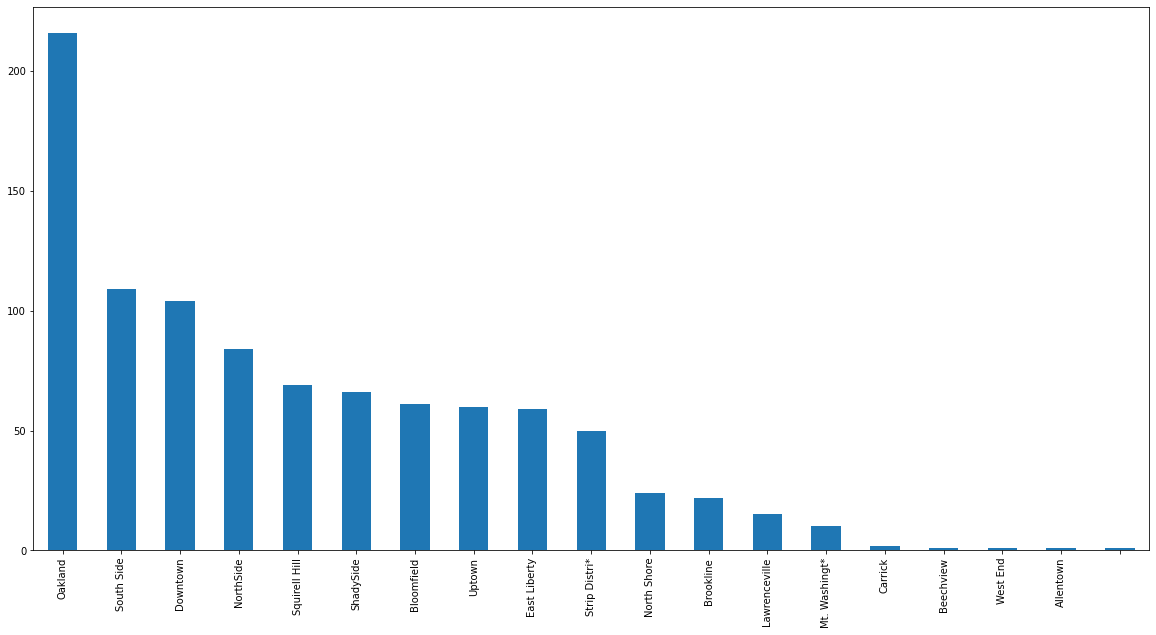

In [17]:
park.plot(kind='bar', figsize=(20,10))

As we can see, **Oakland** blows every other neighborhood out of the water with **216** parking meters. I'll be splitting this number up evenly between North, South, Central, and West Oakland, giving each one 54 parking meters. The most surprising thing to me is that Oakland has more parking meters than Downtown. However, Downtown does have several parking garages, so this adds up.

So after looking at this parking meter data, we know that we're going to have to pick a neighborhood with basically **zero** parking meters. Unfortunately, dozens of neighborhoods have less than 500 arrests and zero parking meters.

Let's import a dataset that I made that contains all of the neighborhoods with 500 arrests or fewer. It's coming down to the wire, and **playgrounds** are going to be the defining factor.

In [29]:
conclude = pd.read_csv("arrests_meters_playground.csv")

conclude

Neighborhood  Arrests  Parking  Playgrounds
0                  Garfield      500        0            2
1         Northview Heights      492        0            0
2               Perry North      474        0            1
3         Bedford Dwellings      438        0            1
4                   Elliott      431        0            3
..                      ...      ...      ...          ...
57        Central Northside       23       84            2
58            Regent Square       22        0            1
59          Mt. Oliver Boro       16        0            0
60   Troy Hill-Herrs Island        6        0            0
61  Mt. Oliver Neighborhood        2        0            0

[62 rows x 4 columns]

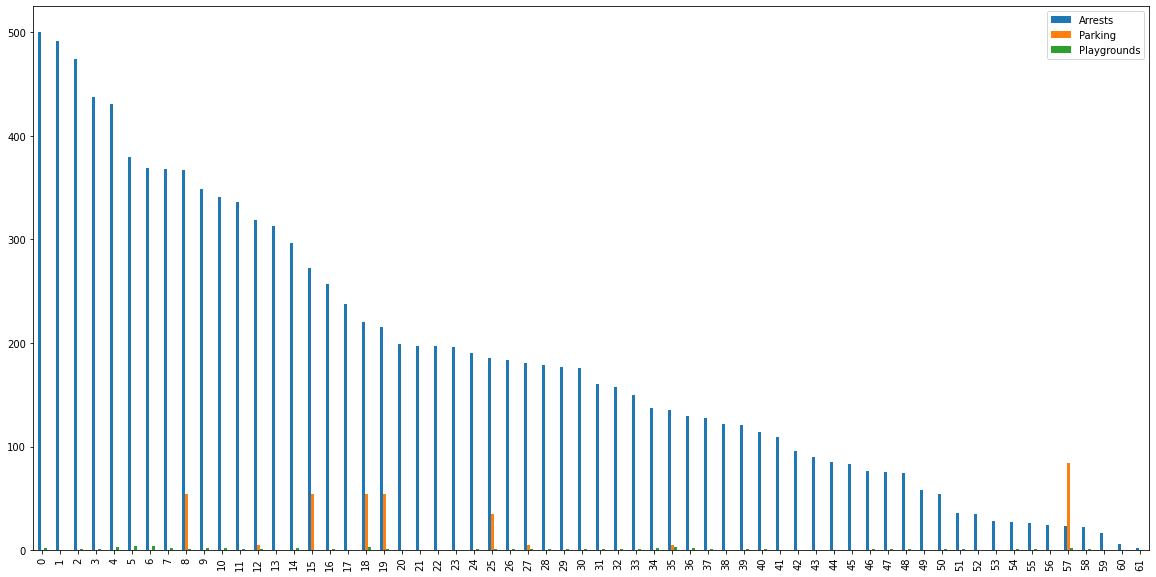

In [23]:
conclude.plot(kind='bar', figsize=(20,10))

It looks like our winner is going to be in the **bottom five** of the dataset I made for neighborhoods with 500 arrests or fewer.
*The winner is......*

![drum roll](https://media.giphy.com/media/FP56vNcwOVyvu/giphy.gif)

# ***Regent Square!!!!!***

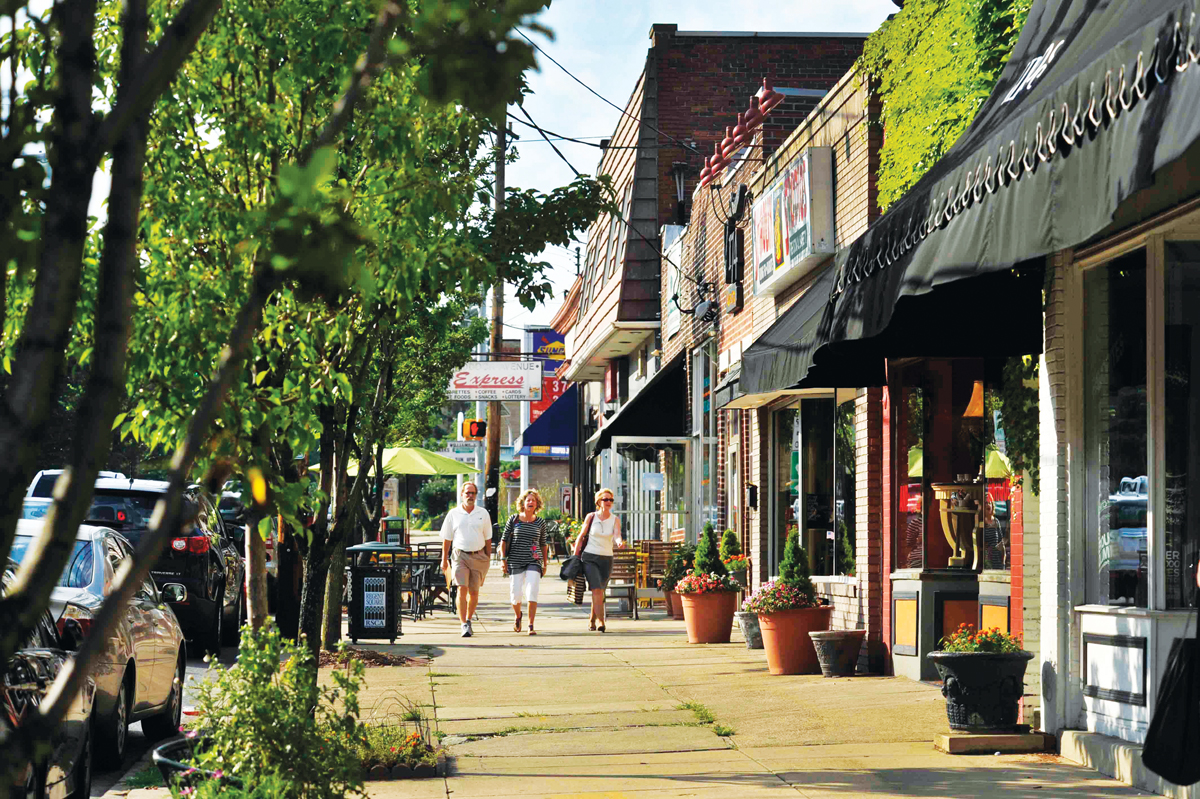
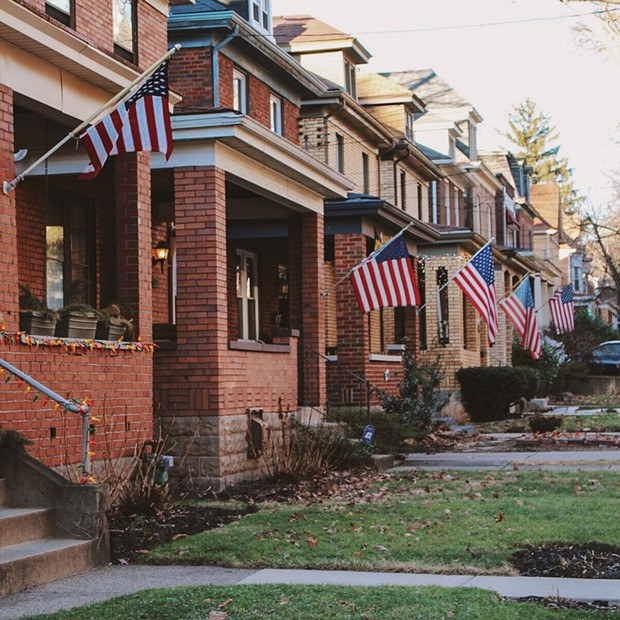

**Regent Square** is a small neighborhood on the eastern end of the city. Regent Square, based on my data analysis, has had **only 22** arrests since 2016, **zero** parking meters and a ***singular*** playground. This puts their livability levels just a bit above neighborhoods like Swisshelm Park, New Homestead, and East Carnegie. Actually, Regent Square's proximity to Swisshelm Park can help it out, as Swisshelm Park has its own playground and only five more arrests.

Regent Square is a quaint neighborhood, with South Braddock Avenue as its main drag. There are several small family-owned businesses that line South Braddock, which provides a homey feel to the entire neighborhood. My personal favorite part about Regent Square is *D's Six Pax and Dogz*. D's is a hot dog joint with a Pittsburgh flair. Their best hot dog **hands down** is called *The Big Ben. The Big Ben* is topped with cheese, fries, and creamy cole slaw (basically Primanti's on a hot dog).

**Central Northside** was a close second to Regent Square on the arrest side of things, with only one arrest seperating the two. Central Northside also had 2 playgrounds, but it has **84 parking meters** which basically put it out of contention.

# Conclusion

This data-driven determination of Regent Square being the best neighborhood doesn't line up with my favorite. I'm fairly certain my favorite would have to be Oakland in general. This isn't just because I go to Pitt though. I went to high school at Central Catholic, which is probably a 10 minute walk from campus. I spent four years roaming Oakland after school with my friends. I've wasted a lot of time in the Carnegie library and at the Forbes/Craig Chipotle. I just don't have the same experience with Regent Square that I do with Oakland (but D's does top a lot of the food here in Oakland).

Yes, Oakland does have 216 parking meters total and 5 playgrounds total, but not many people raise families in Oakland. Much of South Oakland is entirely made up of college students renting houses, and Central Oakland is just lots of apartment buildings. Oakland may be my favorite, but Regent Square is just more livable. 

# Image sources etc.

https://commons.wikimedia.org/wiki/File:Pittsburgh_Pennsylvania_neighborhoods_fade.svg

https://giphy.com/gifs/christmas-swing-the42-FP56vNcwOVyvu

http://pittsburghbeautiful.com/pittsburgh-neighborhoods/regent-square/

http://www.pghcitypaper.com/pittsburgh/picturing-regent-square/Slideshow/1984003/1983974

# Datasets

https://data.wprdc.org/dataset/arrest-data

https://data.wprdc.org/dataset/parking-meters-pittsburgh-parking-authority

https://data.wprdc.org/dataset/playgrounds